### Import Dependencies

In [1]:
import numpy as np
import torch
import torch.nn as nn
from torch.optim import Adam
from Seq2Seq import Seq2Seq
from torch.utils.data import DataLoader

import io
import imageio
from ipywidgets import widgets, HBox
import matplotlib.pyplot as plt
from ConvLSTM import ConvLSTM
from tqdm.notebook import tqdm

import pickle

from util import data_iter

# Control whether we want to compute the loss function based on 
# the entire predicted sequence (original sequence shifted by one)
# or compute the loss function based on the last predicted frame only
entire_sequence_version=False

# Use GPU if available
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

### Import Data and Create Dataloaders

In [2]:
with open("../Preprocessing/fire_conus_no_meteo.pickle", "rb") as file:
    data_list=pickle.load(file)

In [3]:
train_loader=data_iter(data_list, device=device)

### Instantiate Model, Optimizer and Loss

In [4]:
# The input video frames are grayscale, thus single channel
if entire_sequence_version:
    model = Seq2Seq(num_channels=1, out_channels=1, num_kernels=64, 
    kernel_size=(3, 3), padding=(1, 1), activation="relu", 
    frame_size=(32, 32), num_layers=3, return_sequences=True).to(device)
else:
    model = Seq2Seq(num_channels=4, out_channels=1, num_kernels=64, 
    kernel_size=(3, 3), padding=(1, 1), activation="relu", 
    frame_size=(32, 32), num_layers=3, variable_len=True).to(device)
    

optim = Adam(model.parameters(), lr=1e-4)

# Binary Cross Entropy, target pixel values either 0 or 1
criterion = nn.BCELoss(reduction='sum')

### Train for about 20 epochs

In [5]:
num_epochs = 500

for epoch in range(1, num_epochs+1):
    train_loss = 0                                                 
    model.train()                                                  
    for batch_num, (input, target, length) in enumerate(tqdm(data_iter(data_list, device=device), total=int(np.ceil(len(data_list)/10)))):
        output = model(input, length)                                     
        loss = criterion(output.squeeze(1).flatten(), target.flatten())       
        loss.backward()                                            
        optim.step()                                               
        optim.zero_grad()                                           
        train_loss += loss.item()                                 
    train_loss /= len(data_list)
    
    '''
    val_loss = 0                                                 
    model.eval()                                                   
    with torch.no_grad():                                          
        for input, target in val_loader:                          
            output = model(input)                                   
            loss = criterion(output.flatten(), target.flatten())   
            val_loss += loss.item()                                
    val_loss /= len(val_loader.dataset)                            
    '''
    
    print("Epoch:{} Training Loss:{:.2f}".format(epoch, train_loss))
    #print("Epoch:{} Training Loss:{:.2f} Validation Loss:{:.2f}\n".format(
     #   epoch, train_loss, val_loss))

  0%|          | 0/508 [00:00<?, ?it/s]

Epoch:1 Training Loss:52.57


  0%|          | 0/508 [00:00<?, ?it/s]

Epoch:2 Training Loss:24.16


  0%|          | 0/508 [00:00<?, ?it/s]

Epoch:3 Training Loss:25.03


  0%|          | 0/508 [00:00<?, ?it/s]

Epoch:4 Training Loss:20.93


  0%|          | 0/508 [00:00<?, ?it/s]

Epoch:5 Training Loss:20.23


  0%|          | 0/508 [00:00<?, ?it/s]

Epoch:6 Training Loss:20.19


  0%|          | 0/508 [00:00<?, ?it/s]

Epoch:7 Training Loss:19.98


  0%|          | 0/508 [00:00<?, ?it/s]

Epoch:8 Training Loss:19.87


  0%|          | 0/508 [00:00<?, ?it/s]

Epoch:9 Training Loss:19.83


  0%|          | 0/508 [00:00<?, ?it/s]

Epoch:10 Training Loss:19.72


  0%|          | 0/508 [00:00<?, ?it/s]

Epoch:11 Training Loss:19.62


  0%|          | 0/508 [00:00<?, ?it/s]

Epoch:12 Training Loss:19.61


  0%|          | 0/508 [00:00<?, ?it/s]

Epoch:13 Training Loss:19.83


  0%|          | 0/508 [00:00<?, ?it/s]

Epoch:14 Training Loss:19.62


  0%|          | 0/508 [00:00<?, ?it/s]

Epoch:15 Training Loss:19.64


  0%|          | 0/508 [00:00<?, ?it/s]

Epoch:16 Training Loss:19.55


  0%|          | 0/508 [00:00<?, ?it/s]

Epoch:17 Training Loss:19.57


  0%|          | 0/508 [00:00<?, ?it/s]

Epoch:18 Training Loss:19.52


  0%|          | 0/508 [00:00<?, ?it/s]

Epoch:19 Training Loss:19.51


  0%|          | 0/508 [00:00<?, ?it/s]

Epoch:20 Training Loss:19.53


  0%|          | 0/508 [00:00<?, ?it/s]

Epoch:21 Training Loss:19.58


  0%|          | 0/508 [00:00<?, ?it/s]

Epoch:22 Training Loss:19.52


  0%|          | 0/508 [00:00<?, ?it/s]

Epoch:23 Training Loss:19.49


  0%|          | 0/508 [00:00<?, ?it/s]

Epoch:24 Training Loss:19.43


  0%|          | 0/508 [00:00<?, ?it/s]

Epoch:25 Training Loss:19.42


  0%|          | 0/508 [00:00<?, ?it/s]

Epoch:26 Training Loss:20.91


  0%|          | 0/508 [00:00<?, ?it/s]

Epoch:27 Training Loss:19.60


  0%|          | 0/508 [00:00<?, ?it/s]

Epoch:28 Training Loss:19.45


  0%|          | 0/508 [00:00<?, ?it/s]

Epoch:29 Training Loss:19.46


  0%|          | 0/508 [00:00<?, ?it/s]

Epoch:30 Training Loss:19.53


  0%|          | 0/508 [00:00<?, ?it/s]

Epoch:31 Training Loss:19.46


  0%|          | 0/508 [00:00<?, ?it/s]

Epoch:32 Training Loss:19.48


  0%|          | 0/508 [00:00<?, ?it/s]

Epoch:33 Training Loss:19.40


  0%|          | 0/508 [00:00<?, ?it/s]

Epoch:34 Training Loss:19.39


  0%|          | 0/508 [00:00<?, ?it/s]

Epoch:35 Training Loss:19.36


  0%|          | 0/508 [00:00<?, ?it/s]

Epoch:36 Training Loss:19.42


  0%|          | 0/508 [00:00<?, ?it/s]

Epoch:37 Training Loss:19.40


  0%|          | 0/508 [00:00<?, ?it/s]

Epoch:38 Training Loss:19.37


  0%|          | 0/508 [00:00<?, ?it/s]

Epoch:39 Training Loss:19.39


  0%|          | 0/508 [00:00<?, ?it/s]

Epoch:40 Training Loss:19.37


  0%|          | 0/508 [00:00<?, ?it/s]

Epoch:41 Training Loss:19.36


  0%|          | 0/508 [00:00<?, ?it/s]

Epoch:42 Training Loss:19.39


  0%|          | 0/508 [00:00<?, ?it/s]

Epoch:43 Training Loss:19.38


  0%|          | 0/508 [00:00<?, ?it/s]

Epoch:44 Training Loss:19.34


  0%|          | 0/508 [00:00<?, ?it/s]

Epoch:45 Training Loss:19.35


  0%|          | 0/508 [00:00<?, ?it/s]

Epoch:46 Training Loss:19.38


  0%|          | 0/508 [00:00<?, ?it/s]

Epoch:47 Training Loss:19.41


  0%|          | 0/508 [00:00<?, ?it/s]

Epoch:48 Training Loss:19.35


  0%|          | 0/508 [00:00<?, ?it/s]

Epoch:49 Training Loss:19.33


  0%|          | 0/508 [00:00<?, ?it/s]

Epoch:50 Training Loss:19.36


  0%|          | 0/508 [00:00<?, ?it/s]

Epoch:51 Training Loss:19.30


  0%|          | 0/508 [00:00<?, ?it/s]

Epoch:52 Training Loss:19.36


  0%|          | 0/508 [00:00<?, ?it/s]

Epoch:53 Training Loss:19.37


  0%|          | 0/508 [00:00<?, ?it/s]

Epoch:54 Training Loss:19.33


  0%|          | 0/508 [00:00<?, ?it/s]

Epoch:55 Training Loss:19.33


  0%|          | 0/508 [00:00<?, ?it/s]

Epoch:56 Training Loss:19.29


  0%|          | 0/508 [00:00<?, ?it/s]

Epoch:57 Training Loss:19.33


  0%|          | 0/508 [00:00<?, ?it/s]

Epoch:58 Training Loss:19.33


  0%|          | 0/508 [00:00<?, ?it/s]

Epoch:59 Training Loss:19.33


  0%|          | 0/508 [00:00<?, ?it/s]

Epoch:60 Training Loss:19.28


  0%|          | 0/508 [00:00<?, ?it/s]

Epoch:61 Training Loss:19.36


  0%|          | 0/508 [00:00<?, ?it/s]

Epoch:62 Training Loss:19.33


  0%|          | 0/508 [00:00<?, ?it/s]

Epoch:63 Training Loss:19.32


  0%|          | 0/508 [00:00<?, ?it/s]

Epoch:64 Training Loss:19.38


  0%|          | 0/508 [00:00<?, ?it/s]

Epoch:65 Training Loss:19.35


  0%|          | 0/508 [00:00<?, ?it/s]

Epoch:66 Training Loss:19.28


  0%|          | 0/508 [00:00<?, ?it/s]

Epoch:67 Training Loss:19.33


  0%|          | 0/508 [00:00<?, ?it/s]

Epoch:68 Training Loss:19.24


  0%|          | 0/508 [00:00<?, ?it/s]

Epoch:69 Training Loss:19.32


  0%|          | 0/508 [00:00<?, ?it/s]

Epoch:70 Training Loss:19.31


  0%|          | 0/508 [00:00<?, ?it/s]

Epoch:71 Training Loss:19.27


  0%|          | 0/508 [00:00<?, ?it/s]

Epoch:72 Training Loss:19.32


  0%|          | 0/508 [00:00<?, ?it/s]

Epoch:73 Training Loss:19.31


  0%|          | 0/508 [00:00<?, ?it/s]

Epoch:74 Training Loss:19.29


  0%|          | 0/508 [00:00<?, ?it/s]

Epoch:75 Training Loss:19.28


  0%|          | 0/508 [00:00<?, ?it/s]

Epoch:76 Training Loss:19.28


  0%|          | 0/508 [00:00<?, ?it/s]

Epoch:77 Training Loss:19.27


  0%|          | 0/508 [00:00<?, ?it/s]

Epoch:78 Training Loss:19.24


  0%|          | 0/508 [00:00<?, ?it/s]

Epoch:79 Training Loss:19.25


  0%|          | 0/508 [00:00<?, ?it/s]

Epoch:80 Training Loss:19.29


  0%|          | 0/508 [00:00<?, ?it/s]

Epoch:81 Training Loss:19.25


  0%|          | 0/508 [00:00<?, ?it/s]

Epoch:82 Training Loss:19.30


  0%|          | 0/508 [00:00<?, ?it/s]

Epoch:83 Training Loss:19.27


  0%|          | 0/508 [00:00<?, ?it/s]

Epoch:84 Training Loss:19.28


  0%|          | 0/508 [00:00<?, ?it/s]

Epoch:85 Training Loss:19.24


  0%|          | 0/508 [00:00<?, ?it/s]

Epoch:86 Training Loss:19.26


  0%|          | 0/508 [00:00<?, ?it/s]

Epoch:87 Training Loss:19.30


  0%|          | 0/508 [00:00<?, ?it/s]

Epoch:88 Training Loss:19.27


  0%|          | 0/508 [00:00<?, ?it/s]

Epoch:89 Training Loss:19.30


  0%|          | 0/508 [00:00<?, ?it/s]

Epoch:90 Training Loss:19.27


  0%|          | 0/508 [00:00<?, ?it/s]

Epoch:91 Training Loss:19.28


  0%|          | 0/508 [00:00<?, ?it/s]

Epoch:92 Training Loss:19.28


  0%|          | 0/508 [00:00<?, ?it/s]

Epoch:93 Training Loss:19.29


  0%|          | 0/508 [00:00<?, ?it/s]

Epoch:94 Training Loss:19.27


  0%|          | 0/508 [00:00<?, ?it/s]

Epoch:95 Training Loss:19.27


  0%|          | 0/508 [00:00<?, ?it/s]

Epoch:96 Training Loss:19.29


  0%|          | 0/508 [00:00<?, ?it/s]

Epoch:97 Training Loss:19.25


  0%|          | 0/508 [00:00<?, ?it/s]

Epoch:98 Training Loss:19.27


  0%|          | 0/508 [00:00<?, ?it/s]

Epoch:99 Training Loss:19.24


  0%|          | 0/508 [00:00<?, ?it/s]

Epoch:100 Training Loss:19.28


  0%|          | 0/508 [00:00<?, ?it/s]

Epoch:101 Training Loss:19.27


  0%|          | 0/508 [00:00<?, ?it/s]

Epoch:102 Training Loss:19.22


  0%|          | 0/508 [00:00<?, ?it/s]

Epoch:103 Training Loss:19.26


  0%|          | 0/508 [00:00<?, ?it/s]

Epoch:104 Training Loss:19.29


  0%|          | 0/508 [00:00<?, ?it/s]

Epoch:105 Training Loss:19.29


  0%|          | 0/508 [00:00<?, ?it/s]

Epoch:106 Training Loss:19.24


  0%|          | 0/508 [00:00<?, ?it/s]

Epoch:107 Training Loss:19.23


  0%|          | 0/508 [00:00<?, ?it/s]

Epoch:108 Training Loss:19.23


  0%|          | 0/508 [00:00<?, ?it/s]

Epoch:109 Training Loss:19.23


  0%|          | 0/508 [00:00<?, ?it/s]

Epoch:110 Training Loss:19.20


  0%|          | 0/508 [00:00<?, ?it/s]

Epoch:111 Training Loss:19.24


  0%|          | 0/508 [00:00<?, ?it/s]

Epoch:112 Training Loss:19.24


  0%|          | 0/508 [00:00<?, ?it/s]

Epoch:113 Training Loss:19.23


  0%|          | 0/508 [00:00<?, ?it/s]

Epoch:114 Training Loss:19.26


  0%|          | 0/508 [00:00<?, ?it/s]

Epoch:115 Training Loss:19.27


  0%|          | 0/508 [00:00<?, ?it/s]

Epoch:116 Training Loss:19.27


  0%|          | 0/508 [00:00<?, ?it/s]

Epoch:117 Training Loss:19.28


  0%|          | 0/508 [00:00<?, ?it/s]

Epoch:118 Training Loss:19.24


  0%|          | 0/508 [00:00<?, ?it/s]

Epoch:119 Training Loss:19.26


  0%|          | 0/508 [00:00<?, ?it/s]

Epoch:120 Training Loss:19.23


  0%|          | 0/508 [00:00<?, ?it/s]

Epoch:121 Training Loss:19.23


  0%|          | 0/508 [00:00<?, ?it/s]

Epoch:122 Training Loss:19.23


  0%|          | 0/508 [00:00<?, ?it/s]

Epoch:123 Training Loss:19.28


  0%|          | 0/508 [00:00<?, ?it/s]

Epoch:124 Training Loss:19.27


  0%|          | 0/508 [00:00<?, ?it/s]

Epoch:125 Training Loss:19.26


  0%|          | 0/508 [00:00<?, ?it/s]

Epoch:126 Training Loss:19.36


  0%|          | 0/508 [00:00<?, ?it/s]

Epoch:127 Training Loss:19.23


  0%|          | 0/508 [00:00<?, ?it/s]

Epoch:128 Training Loss:19.28


  0%|          | 0/508 [00:00<?, ?it/s]

Epoch:129 Training Loss:19.25


  0%|          | 0/508 [00:00<?, ?it/s]

Epoch:130 Training Loss:19.25


  0%|          | 0/508 [00:00<?, ?it/s]

Epoch:131 Training Loss:19.22


  0%|          | 0/508 [00:00<?, ?it/s]

Epoch:132 Training Loss:19.26


  0%|          | 0/508 [00:00<?, ?it/s]

Epoch:133 Training Loss:19.27


  0%|          | 0/508 [00:00<?, ?it/s]

Epoch:134 Training Loss:19.23


  0%|          | 0/508 [00:00<?, ?it/s]

Epoch:135 Training Loss:19.24


  0%|          | 0/508 [00:00<?, ?it/s]

Epoch:136 Training Loss:19.23


  0%|          | 0/508 [00:00<?, ?it/s]

Epoch:137 Training Loss:19.25


  0%|          | 0/508 [00:00<?, ?it/s]

Epoch:138 Training Loss:19.24


  0%|          | 0/508 [00:00<?, ?it/s]

Epoch:139 Training Loss:19.24


  0%|          | 0/508 [00:00<?, ?it/s]

Epoch:140 Training Loss:19.30


  0%|          | 0/508 [00:00<?, ?it/s]

Epoch:141 Training Loss:19.29


  0%|          | 0/508 [00:00<?, ?it/s]

Epoch:142 Training Loss:19.32


  0%|          | 0/508 [00:00<?, ?it/s]

Epoch:143 Training Loss:19.30


  0%|          | 0/508 [00:00<?, ?it/s]

Epoch:144 Training Loss:19.28


  0%|          | 0/508 [00:00<?, ?it/s]

Epoch:145 Training Loss:19.24


  0%|          | 0/508 [00:00<?, ?it/s]

Epoch:146 Training Loss:19.23


  0%|          | 0/508 [00:00<?, ?it/s]

Epoch:147 Training Loss:19.33


  0%|          | 0/508 [00:00<?, ?it/s]

Epoch:148 Training Loss:19.26


  0%|          | 0/508 [00:00<?, ?it/s]

Epoch:149 Training Loss:19.27


  0%|          | 0/508 [00:00<?, ?it/s]

Epoch:150 Training Loss:19.23


  0%|          | 0/508 [00:00<?, ?it/s]

Epoch:151 Training Loss:19.25


  0%|          | 0/508 [00:00<?, ?it/s]

Epoch:152 Training Loss:19.25


  0%|          | 0/508 [00:00<?, ?it/s]

Epoch:153 Training Loss:19.27


  0%|          | 0/508 [00:00<?, ?it/s]

Epoch:154 Training Loss:19.22


  0%|          | 0/508 [00:00<?, ?it/s]

Epoch:155 Training Loss:19.27


  0%|          | 0/508 [00:00<?, ?it/s]

Epoch:156 Training Loss:19.25


  0%|          | 0/508 [00:00<?, ?it/s]

Epoch:157 Training Loss:19.24


  0%|          | 0/508 [00:00<?, ?it/s]

Epoch:158 Training Loss:19.28


  0%|          | 0/508 [00:00<?, ?it/s]

Epoch:159 Training Loss:19.60


  0%|          | 0/508 [00:00<?, ?it/s]

Epoch:160 Training Loss:19.35


  0%|          | 0/508 [00:00<?, ?it/s]

Epoch:161 Training Loss:19.35


  0%|          | 0/508 [00:00<?, ?it/s]

Epoch:162 Training Loss:19.34


  0%|          | 0/508 [00:00<?, ?it/s]

Epoch:163 Training Loss:19.33


  0%|          | 0/508 [00:00<?, ?it/s]

Epoch:164 Training Loss:19.31


  0%|          | 0/508 [00:00<?, ?it/s]

Epoch:165 Training Loss:19.27


  0%|          | 0/508 [00:00<?, ?it/s]

Epoch:166 Training Loss:19.21


  0%|          | 0/508 [00:00<?, ?it/s]

Epoch:167 Training Loss:19.26


  0%|          | 0/508 [00:00<?, ?it/s]

Epoch:168 Training Loss:19.27


  0%|          | 0/508 [00:00<?, ?it/s]

Epoch:169 Training Loss:19.30


  0%|          | 0/508 [00:00<?, ?it/s]

Epoch:170 Training Loss:19.25


  0%|          | 0/508 [00:00<?, ?it/s]

Epoch:171 Training Loss:19.26


  0%|          | 0/508 [00:00<?, ?it/s]

Epoch:172 Training Loss:19.24


  0%|          | 0/508 [00:00<?, ?it/s]

Epoch:173 Training Loss:19.27


  0%|          | 0/508 [00:00<?, ?it/s]

Epoch:174 Training Loss:19.24


  0%|          | 0/508 [00:00<?, ?it/s]

Epoch:175 Training Loss:19.24


  0%|          | 0/508 [00:00<?, ?it/s]

Epoch:176 Training Loss:19.26


  0%|          | 0/508 [00:00<?, ?it/s]

Epoch:177 Training Loss:19.27


  0%|          | 0/508 [00:00<?, ?it/s]

Epoch:178 Training Loss:19.28


  0%|          | 0/508 [00:00<?, ?it/s]

Epoch:179 Training Loss:19.27


  0%|          | 0/508 [00:00<?, ?it/s]

Epoch:180 Training Loss:19.28


  0%|          | 0/508 [00:00<?, ?it/s]

Epoch:181 Training Loss:19.20


  0%|          | 0/508 [00:00<?, ?it/s]

Epoch:182 Training Loss:19.23


  0%|          | 0/508 [00:00<?, ?it/s]

Epoch:183 Training Loss:19.25


  0%|          | 0/508 [00:00<?, ?it/s]

Epoch:184 Training Loss:19.22


  0%|          | 0/508 [00:00<?, ?it/s]

Epoch:185 Training Loss:19.27


  0%|          | 0/508 [00:00<?, ?it/s]

Epoch:186 Training Loss:19.27


  0%|          | 0/508 [00:00<?, ?it/s]

Epoch:187 Training Loss:19.26


  0%|          | 0/508 [00:00<?, ?it/s]

Epoch:188 Training Loss:19.24


  0%|          | 0/508 [00:00<?, ?it/s]

Epoch:189 Training Loss:19.25


  0%|          | 0/508 [00:00<?, ?it/s]

Epoch:190 Training Loss:19.29


  0%|          | 0/508 [00:00<?, ?it/s]

Epoch:191 Training Loss:19.22


  0%|          | 0/508 [00:00<?, ?it/s]

Epoch:192 Training Loss:20.60


  0%|          | 0/508 [00:00<?, ?it/s]

Epoch:193 Training Loss:19.24


  0%|          | 0/508 [00:00<?, ?it/s]

Epoch:194 Training Loss:19.21


  0%|          | 0/508 [00:00<?, ?it/s]

Epoch:195 Training Loss:19.21


  0%|          | 0/508 [00:00<?, ?it/s]

Epoch:196 Training Loss:19.22


  0%|          | 0/508 [00:00<?, ?it/s]

Epoch:197 Training Loss:19.29


  0%|          | 0/508 [00:00<?, ?it/s]

Epoch:198 Training Loss:19.24


  0%|          | 0/508 [00:00<?, ?it/s]

Epoch:199 Training Loss:19.27


  0%|          | 0/508 [00:00<?, ?it/s]

Epoch:200 Training Loss:19.25


  0%|          | 0/508 [00:00<?, ?it/s]

Epoch:201 Training Loss:19.27


  0%|          | 0/508 [00:00<?, ?it/s]

Epoch:202 Training Loss:19.24


  0%|          | 0/508 [00:00<?, ?it/s]

Epoch:203 Training Loss:19.26


  0%|          | 0/508 [00:00<?, ?it/s]

Epoch:204 Training Loss:19.27


  0%|          | 0/508 [00:00<?, ?it/s]

Epoch:205 Training Loss:19.24


  0%|          | 0/508 [00:00<?, ?it/s]

Epoch:206 Training Loss:19.29


  0%|          | 0/508 [00:00<?, ?it/s]

Epoch:207 Training Loss:19.90


  0%|          | 0/508 [00:00<?, ?it/s]

Epoch:208 Training Loss:19.89


  0%|          | 0/508 [00:00<?, ?it/s]

Epoch:209 Training Loss:19.49


  0%|          | 0/508 [00:00<?, ?it/s]

Epoch:210 Training Loss:19.47


  0%|          | 0/508 [00:00<?, ?it/s]

Epoch:211 Training Loss:19.48


  0%|          | 0/508 [00:00<?, ?it/s]

Epoch:212 Training Loss:19.46


  0%|          | 0/508 [00:00<?, ?it/s]

Epoch:213 Training Loss:19.37


  0%|          | 0/508 [00:00<?, ?it/s]

Epoch:214 Training Loss:19.34


  0%|          | 0/508 [00:00<?, ?it/s]

Epoch:215 Training Loss:19.30


  0%|          | 0/508 [00:00<?, ?it/s]

Epoch:216 Training Loss:19.31


  0%|          | 0/508 [00:00<?, ?it/s]

Epoch:217 Training Loss:19.42


  0%|          | 0/508 [00:00<?, ?it/s]

Epoch:218 Training Loss:19.36


  0%|          | 0/508 [00:00<?, ?it/s]

Epoch:219 Training Loss:19.35


  0%|          | 0/508 [00:00<?, ?it/s]

Epoch:220 Training Loss:19.36


  0%|          | 0/508 [00:00<?, ?it/s]

Epoch:221 Training Loss:19.32


  0%|          | 0/508 [00:00<?, ?it/s]

Epoch:222 Training Loss:19.28


  0%|          | 0/508 [00:00<?, ?it/s]

Epoch:223 Training Loss:19.27


  0%|          | 0/508 [00:00<?, ?it/s]

Epoch:224 Training Loss:19.29


  0%|          | 0/508 [00:00<?, ?it/s]

Epoch:225 Training Loss:19.36


  0%|          | 0/508 [00:00<?, ?it/s]

Epoch:226 Training Loss:19.29


  0%|          | 0/508 [00:00<?, ?it/s]

Epoch:227 Training Loss:19.24


  0%|          | 0/508 [00:00<?, ?it/s]

Epoch:228 Training Loss:19.28


  0%|          | 0/508 [00:00<?, ?it/s]

Epoch:229 Training Loss:19.33


  0%|          | 0/508 [00:00<?, ?it/s]

Epoch:230 Training Loss:19.27


  0%|          | 0/508 [00:00<?, ?it/s]

Epoch:231 Training Loss:19.23


  0%|          | 0/508 [00:00<?, ?it/s]

Epoch:232 Training Loss:19.24


  0%|          | 0/508 [00:00<?, ?it/s]

Epoch:233 Training Loss:19.23


  0%|          | 0/508 [00:00<?, ?it/s]

Epoch:234 Training Loss:19.31


  0%|          | 0/508 [00:00<?, ?it/s]

Epoch:235 Training Loss:19.27


  0%|          | 0/508 [00:00<?, ?it/s]

Epoch:236 Training Loss:19.22


  0%|          | 0/508 [00:00<?, ?it/s]

Epoch:237 Training Loss:19.26


  0%|          | 0/508 [00:00<?, ?it/s]

Epoch:238 Training Loss:19.24


  0%|          | 0/508 [00:00<?, ?it/s]

Epoch:239 Training Loss:19.26


  0%|          | 0/508 [00:00<?, ?it/s]

Epoch:240 Training Loss:19.24


  0%|          | 0/508 [00:00<?, ?it/s]

Epoch:241 Training Loss:19.20


  0%|          | 0/508 [00:00<?, ?it/s]

Epoch:242 Training Loss:19.23


  0%|          | 0/508 [00:00<?, ?it/s]

Epoch:243 Training Loss:19.27


  0%|          | 0/508 [00:00<?, ?it/s]

Epoch:244 Training Loss:19.27


  0%|          | 0/508 [00:00<?, ?it/s]

Epoch:245 Training Loss:19.26


  0%|          | 0/508 [00:00<?, ?it/s]

Epoch:246 Training Loss:19.26


  0%|          | 0/508 [00:00<?, ?it/s]

Epoch:247 Training Loss:19.25


  0%|          | 0/508 [00:00<?, ?it/s]

Epoch:248 Training Loss:19.64


  0%|          | 0/508 [00:00<?, ?it/s]

Epoch:249 Training Loss:19.79


  0%|          | 0/508 [00:00<?, ?it/s]

Epoch:250 Training Loss:19.56


  0%|          | 0/508 [00:00<?, ?it/s]

Epoch:251 Training Loss:19.43


  0%|          | 0/508 [00:00<?, ?it/s]

Epoch:252 Training Loss:19.55


  0%|          | 0/508 [00:00<?, ?it/s]

Epoch:253 Training Loss:19.42


  0%|          | 0/508 [00:00<?, ?it/s]

Epoch:254 Training Loss:19.42


  0%|          | 0/508 [00:00<?, ?it/s]

Epoch:255 Training Loss:19.35


  0%|          | 0/508 [00:00<?, ?it/s]

Epoch:256 Training Loss:19.37


  0%|          | 0/508 [00:00<?, ?it/s]

Epoch:257 Training Loss:19.37


  0%|          | 0/508 [00:00<?, ?it/s]

Epoch:258 Training Loss:19.34


  0%|          | 0/508 [00:00<?, ?it/s]

Epoch:259 Training Loss:19.25


  0%|          | 0/508 [00:00<?, ?it/s]

Epoch:260 Training Loss:19.26


  0%|          | 0/508 [00:00<?, ?it/s]

Epoch:261 Training Loss:19.26


  0%|          | 0/508 [00:00<?, ?it/s]

Epoch:262 Training Loss:19.27


  0%|          | 0/508 [00:00<?, ?it/s]

Epoch:263 Training Loss:19.22


  0%|          | 0/508 [00:00<?, ?it/s]

Epoch:264 Training Loss:19.26


  0%|          | 0/508 [00:00<?, ?it/s]

Epoch:265 Training Loss:19.26


  0%|          | 0/508 [00:00<?, ?it/s]

Epoch:266 Training Loss:19.26


  0%|          | 0/508 [00:00<?, ?it/s]

Epoch:267 Training Loss:19.41


  0%|          | 0/508 [00:00<?, ?it/s]

Epoch:268 Training Loss:19.29


  0%|          | 0/508 [00:00<?, ?it/s]

Epoch:269 Training Loss:19.34


  0%|          | 0/508 [00:00<?, ?it/s]

Epoch:270 Training Loss:19.30


  0%|          | 0/508 [00:00<?, ?it/s]

Epoch:271 Training Loss:19.28


  0%|          | 0/508 [00:00<?, ?it/s]

Epoch:272 Training Loss:19.25


  0%|          | 0/508 [00:00<?, ?it/s]

Epoch:273 Training Loss:19.29


  0%|          | 0/508 [00:00<?, ?it/s]

Epoch:274 Training Loss:19.24


  0%|          | 0/508 [00:00<?, ?it/s]

Epoch:275 Training Loss:19.26


  0%|          | 0/508 [00:00<?, ?it/s]

Epoch:276 Training Loss:19.23


  0%|          | 0/508 [00:00<?, ?it/s]

Epoch:277 Training Loss:19.26


  0%|          | 0/508 [00:00<?, ?it/s]

Epoch:278 Training Loss:19.28


  0%|          | 0/508 [00:00<?, ?it/s]

Epoch:279 Training Loss:19.24


  0%|          | 0/508 [00:00<?, ?it/s]

Epoch:280 Training Loss:19.25


  0%|          | 0/508 [00:00<?, ?it/s]

Epoch:281 Training Loss:19.35


  0%|          | 0/508 [00:00<?, ?it/s]

Epoch:282 Training Loss:19.37


  0%|          | 0/508 [00:00<?, ?it/s]

Epoch:283 Training Loss:19.38


  0%|          | 0/508 [00:00<?, ?it/s]

Epoch:284 Training Loss:19.44


  0%|          | 0/508 [00:00<?, ?it/s]

Epoch:285 Training Loss:19.29


  0%|          | 0/508 [00:00<?, ?it/s]

Epoch:286 Training Loss:19.34


  0%|          | 0/508 [00:00<?, ?it/s]

Epoch:287 Training Loss:19.31


  0%|          | 0/508 [00:00<?, ?it/s]

Epoch:288 Training Loss:19.29


  0%|          | 0/508 [00:00<?, ?it/s]

Epoch:289 Training Loss:19.30


  0%|          | 0/508 [00:00<?, ?it/s]

Epoch:290 Training Loss:19.32


  0%|          | 0/508 [00:00<?, ?it/s]

Epoch:291 Training Loss:19.28


  0%|          | 0/508 [00:00<?, ?it/s]

Epoch:292 Training Loss:19.27


  0%|          | 0/508 [00:00<?, ?it/s]

Epoch:293 Training Loss:19.26


  0%|          | 0/508 [00:00<?, ?it/s]

Epoch:294 Training Loss:19.38


  0%|          | 0/508 [00:00<?, ?it/s]

Epoch:295 Training Loss:19.26


  0%|          | 0/508 [00:00<?, ?it/s]

Epoch:296 Training Loss:19.26


  0%|          | 0/508 [00:00<?, ?it/s]

Epoch:297 Training Loss:19.27


  0%|          | 0/508 [00:00<?, ?it/s]

Epoch:298 Training Loss:19.25


  0%|          | 0/508 [00:00<?, ?it/s]

Epoch:299 Training Loss:20.02


  0%|          | 0/508 [00:00<?, ?it/s]

Epoch:300 Training Loss:20.00


  0%|          | 0/508 [00:00<?, ?it/s]

Epoch:301 Training Loss:19.89


  0%|          | 0/508 [00:00<?, ?it/s]

Epoch:302 Training Loss:20.01


  0%|          | 0/508 [00:00<?, ?it/s]

Epoch:303 Training Loss:20.17


  0%|          | 0/508 [00:00<?, ?it/s]

Epoch:304 Training Loss:19.89


  0%|          | 0/508 [00:00<?, ?it/s]

Epoch:305 Training Loss:19.95


  0%|          | 0/508 [00:00<?, ?it/s]

Epoch:306 Training Loss:19.88


  0%|          | 0/508 [00:00<?, ?it/s]

Epoch:307 Training Loss:19.87


  0%|          | 0/508 [00:00<?, ?it/s]

Epoch:308 Training Loss:19.72


  0%|          | 0/508 [00:00<?, ?it/s]

Epoch:309 Training Loss:19.81


  0%|          | 0/508 [00:00<?, ?it/s]

Epoch:310 Training Loss:19.71


  0%|          | 0/508 [00:00<?, ?it/s]

Epoch:311 Training Loss:19.77


  0%|          | 0/508 [00:00<?, ?it/s]

Epoch:312 Training Loss:19.84


  0%|          | 0/508 [00:00<?, ?it/s]

Epoch:313 Training Loss:19.78


  0%|          | 0/508 [00:00<?, ?it/s]

Epoch:314 Training Loss:19.68


  0%|          | 0/508 [00:00<?, ?it/s]

Epoch:315 Training Loss:19.69


  0%|          | 0/508 [00:00<?, ?it/s]

Epoch:316 Training Loss:19.60


  0%|          | 0/508 [00:00<?, ?it/s]

Epoch:317 Training Loss:19.62


  0%|          | 0/508 [00:00<?, ?it/s]

Epoch:318 Training Loss:19.61


  0%|          | 0/508 [00:00<?, ?it/s]

Epoch:319 Training Loss:19.79


  0%|          | 0/508 [00:00<?, ?it/s]

Epoch:320 Training Loss:20.07


  0%|          | 0/508 [00:00<?, ?it/s]

Epoch:321 Training Loss:19.83


  0%|          | 0/508 [00:00<?, ?it/s]

Epoch:322 Training Loss:19.69


  0%|          | 0/508 [00:00<?, ?it/s]

Epoch:323 Training Loss:19.57


  0%|          | 0/508 [00:00<?, ?it/s]

Epoch:324 Training Loss:19.58


  0%|          | 0/508 [00:00<?, ?it/s]

Epoch:325 Training Loss:19.65


  0%|          | 0/508 [00:00<?, ?it/s]

Epoch:326 Training Loss:19.47


  0%|          | 0/508 [00:00<?, ?it/s]

Epoch:327 Training Loss:19.53


  0%|          | 0/508 [00:00<?, ?it/s]

Epoch:328 Training Loss:19.57


  0%|          | 0/508 [00:00<?, ?it/s]

Epoch:329 Training Loss:19.95


  0%|          | 0/508 [00:00<?, ?it/s]

Epoch:330 Training Loss:20.49


  0%|          | 0/508 [00:00<?, ?it/s]

Epoch:331 Training Loss:20.13


  0%|          | 0/508 [00:00<?, ?it/s]

Epoch:332 Training Loss:20.05


  0%|          | 0/508 [00:00<?, ?it/s]

Epoch:333 Training Loss:20.27


  0%|          | 0/508 [00:00<?, ?it/s]

Epoch:334 Training Loss:20.07


  0%|          | 0/508 [00:00<?, ?it/s]

Epoch:335 Training Loss:20.12


  0%|          | 0/508 [00:00<?, ?it/s]

Epoch:336 Training Loss:19.98


  0%|          | 0/508 [00:00<?, ?it/s]

Epoch:337 Training Loss:19.87


  0%|          | 0/508 [00:00<?, ?it/s]

Epoch:338 Training Loss:20.00


  0%|          | 0/508 [00:00<?, ?it/s]

Epoch:339 Training Loss:20.01


  0%|          | 0/508 [00:00<?, ?it/s]

Epoch:340 Training Loss:20.10


  0%|          | 0/508 [00:00<?, ?it/s]

Epoch:341 Training Loss:20.08


  0%|          | 0/508 [00:00<?, ?it/s]

Epoch:342 Training Loss:19.90


  0%|          | 0/508 [00:00<?, ?it/s]

Epoch:343 Training Loss:19.74


  0%|          | 0/508 [00:00<?, ?it/s]

Epoch:344 Training Loss:20.48


  0%|          | 0/508 [00:00<?, ?it/s]

Epoch:345 Training Loss:21.11


  0%|          | 0/508 [00:00<?, ?it/s]

Epoch:346 Training Loss:21.74


  0%|          | 0/508 [00:00<?, ?it/s]

Epoch:347 Training Loss:24.08


  0%|          | 0/508 [00:00<?, ?it/s]

Epoch:348 Training Loss:22.88


  0%|          | 0/508 [00:00<?, ?it/s]

Epoch:349 Training Loss:22.21


  0%|          | 0/508 [00:00<?, ?it/s]

Epoch:350 Training Loss:22.52


  0%|          | 0/508 [00:00<?, ?it/s]

Epoch:351 Training Loss:21.63


  0%|          | 0/508 [00:00<?, ?it/s]

Epoch:352 Training Loss:22.32


  0%|          | 0/508 [00:00<?, ?it/s]

Epoch:353 Training Loss:22.19


  0%|          | 0/508 [00:00<?, ?it/s]

Epoch:354 Training Loss:22.32


  0%|          | 0/508 [00:00<?, ?it/s]

Epoch:355 Training Loss:25.45


  0%|          | 0/508 [00:00<?, ?it/s]

Epoch:356 Training Loss:25.37


  0%|          | 0/508 [00:00<?, ?it/s]

Epoch:357 Training Loss:24.50


  0%|          | 0/508 [00:00<?, ?it/s]

Epoch:358 Training Loss:24.86


  0%|          | 0/508 [00:00<?, ?it/s]

Epoch:359 Training Loss:24.54


  0%|          | 0/508 [00:00<?, ?it/s]

Epoch:360 Training Loss:23.63


  0%|          | 0/508 [00:00<?, ?it/s]

Epoch:361 Training Loss:23.33


  0%|          | 0/508 [00:00<?, ?it/s]

Epoch:362 Training Loss:23.59


  0%|          | 0/508 [00:00<?, ?it/s]

Epoch:363 Training Loss:23.34


  0%|          | 0/508 [00:00<?, ?it/s]

Epoch:364 Training Loss:23.27


  0%|          | 0/508 [00:00<?, ?it/s]

Epoch:365 Training Loss:23.52


  0%|          | 0/508 [00:00<?, ?it/s]

Epoch:366 Training Loss:24.44


  0%|          | 0/508 [00:00<?, ?it/s]

Epoch:367 Training Loss:24.32


  0%|          | 0/508 [00:00<?, ?it/s]

Epoch:368 Training Loss:24.04


  0%|          | 0/508 [00:00<?, ?it/s]

Epoch:369 Training Loss:24.39


  0%|          | 0/508 [00:00<?, ?it/s]

Epoch:370 Training Loss:24.39


  0%|          | 0/508 [00:00<?, ?it/s]

Epoch:371 Training Loss:24.48


  0%|          | 0/508 [00:00<?, ?it/s]

Epoch:372 Training Loss:24.35


  0%|          | 0/508 [00:00<?, ?it/s]

Epoch:373 Training Loss:25.92


  0%|          | 0/508 [00:00<?, ?it/s]

Epoch:374 Training Loss:26.01


  0%|          | 0/508 [00:00<?, ?it/s]

Epoch:375 Training Loss:25.89


  0%|          | 0/508 [00:00<?, ?it/s]

Epoch:376 Training Loss:26.09


  0%|          | 0/508 [00:00<?, ?it/s]

Epoch:377 Training Loss:26.41


  0%|          | 0/508 [00:00<?, ?it/s]

Epoch:378 Training Loss:26.17


  0%|          | 0/508 [00:00<?, ?it/s]

Epoch:379 Training Loss:25.94


  0%|          | 0/508 [00:00<?, ?it/s]

Epoch:380 Training Loss:25.80


  0%|          | 0/508 [00:00<?, ?it/s]

Epoch:381 Training Loss:25.74


  0%|          | 0/508 [00:00<?, ?it/s]

Epoch:382 Training Loss:25.65


  0%|          | 0/508 [00:00<?, ?it/s]

Epoch:383 Training Loss:25.74


  0%|          | 0/508 [00:00<?, ?it/s]

Epoch:384 Training Loss:25.46


  0%|          | 0/508 [00:00<?, ?it/s]

Epoch:385 Training Loss:24.97


  0%|          | 0/508 [00:00<?, ?it/s]

Epoch:386 Training Loss:24.56


  0%|          | 0/508 [00:00<?, ?it/s]

Epoch:387 Training Loss:24.30


  0%|          | 0/508 [00:00<?, ?it/s]

Epoch:388 Training Loss:24.11


  0%|          | 0/508 [00:00<?, ?it/s]

Epoch:389 Training Loss:25.25


  0%|          | 0/508 [00:00<?, ?it/s]

Epoch:390 Training Loss:26.51


  0%|          | 0/508 [00:00<?, ?it/s]

Epoch:391 Training Loss:26.40


  0%|          | 0/508 [00:00<?, ?it/s]

Epoch:392 Training Loss:26.29


  0%|          | 0/508 [00:00<?, ?it/s]

Epoch:393 Training Loss:26.48


  0%|          | 0/508 [00:00<?, ?it/s]

Epoch:394 Training Loss:26.30


  0%|          | 0/508 [00:00<?, ?it/s]

Epoch:395 Training Loss:25.91


  0%|          | 0/508 [00:00<?, ?it/s]

Epoch:396 Training Loss:26.05


  0%|          | 0/508 [00:00<?, ?it/s]

Epoch:397 Training Loss:25.98


  0%|          | 0/508 [00:00<?, ?it/s]

Epoch:398 Training Loss:26.22


  0%|          | 0/508 [00:00<?, ?it/s]

Epoch:399 Training Loss:26.40


  0%|          | 0/508 [00:00<?, ?it/s]

Epoch:400 Training Loss:26.03


  0%|          | 0/508 [00:00<?, ?it/s]

Epoch:401 Training Loss:26.20


  0%|          | 0/508 [00:00<?, ?it/s]

Epoch:402 Training Loss:26.00


  0%|          | 0/508 [00:00<?, ?it/s]

Epoch:403 Training Loss:25.78


  0%|          | 0/508 [00:00<?, ?it/s]

Epoch:404 Training Loss:25.95


  0%|          | 0/508 [00:00<?, ?it/s]

Epoch:405 Training Loss:26.27


  0%|          | 0/508 [00:00<?, ?it/s]

Epoch:406 Training Loss:26.39


  0%|          | 0/508 [00:00<?, ?it/s]

Epoch:407 Training Loss:26.28


  0%|          | 0/508 [00:00<?, ?it/s]

Epoch:408 Training Loss:26.60


  0%|          | 0/508 [00:00<?, ?it/s]

Epoch:409 Training Loss:26.34


  0%|          | 0/508 [00:00<?, ?it/s]

Epoch:410 Training Loss:26.12


  0%|          | 0/508 [00:00<?, ?it/s]

Epoch:411 Training Loss:25.93


  0%|          | 0/508 [00:00<?, ?it/s]

Epoch:412 Training Loss:25.77


  0%|          | 0/508 [00:00<?, ?it/s]

Epoch:413 Training Loss:25.59


  0%|          | 0/508 [00:00<?, ?it/s]

Epoch:414 Training Loss:25.68


  0%|          | 0/508 [00:00<?, ?it/s]

Epoch:415 Training Loss:25.46


  0%|          | 0/508 [00:00<?, ?it/s]

Epoch:416 Training Loss:24.97


  0%|          | 0/508 [00:00<?, ?it/s]

Epoch:417 Training Loss:24.86


  0%|          | 0/508 [00:00<?, ?it/s]

Epoch:418 Training Loss:24.58


  0%|          | 0/508 [00:00<?, ?it/s]

Epoch:419 Training Loss:25.28


  0%|          | 0/508 [00:00<?, ?it/s]

Epoch:420 Training Loss:24.78


  0%|          | 0/508 [00:00<?, ?it/s]

Epoch:421 Training Loss:24.87


  0%|          | 0/508 [00:00<?, ?it/s]

Epoch:422 Training Loss:24.63


  0%|          | 0/508 [00:00<?, ?it/s]

Epoch:423 Training Loss:24.37


  0%|          | 0/508 [00:00<?, ?it/s]

Epoch:424 Training Loss:24.39


  0%|          | 0/508 [00:00<?, ?it/s]

Epoch:425 Training Loss:24.02


  0%|          | 0/508 [00:00<?, ?it/s]

Epoch:426 Training Loss:23.80


  0%|          | 0/508 [00:00<?, ?it/s]

Epoch:427 Training Loss:23.73


  0%|          | 0/508 [00:00<?, ?it/s]

Epoch:428 Training Loss:23.60


  0%|          | 0/508 [00:00<?, ?it/s]

Epoch:429 Training Loss:23.79


  0%|          | 0/508 [00:00<?, ?it/s]

Epoch:430 Training Loss:24.55


  0%|          | 0/508 [00:00<?, ?it/s]

Epoch:431 Training Loss:24.93


  0%|          | 0/508 [00:00<?, ?it/s]

Epoch:432 Training Loss:24.65


  0%|          | 0/508 [00:00<?, ?it/s]

Epoch:433 Training Loss:24.66


  0%|          | 0/508 [00:00<?, ?it/s]

Epoch:434 Training Loss:24.13


  0%|          | 0/508 [00:00<?, ?it/s]

Epoch:435 Training Loss:24.04


  0%|          | 0/508 [00:00<?, ?it/s]

Epoch:436 Training Loss:24.34


  0%|          | 0/508 [00:00<?, ?it/s]

Epoch:437 Training Loss:24.26


  0%|          | 0/508 [00:00<?, ?it/s]

Epoch:438 Training Loss:24.16


  0%|          | 0/508 [00:00<?, ?it/s]

Epoch:439 Training Loss:24.35


  0%|          | 0/508 [00:00<?, ?it/s]

Epoch:440 Training Loss:24.00


  0%|          | 0/508 [00:00<?, ?it/s]

Epoch:441 Training Loss:23.79


  0%|          | 0/508 [00:00<?, ?it/s]

Epoch:442 Training Loss:23.15


  0%|          | 0/508 [00:00<?, ?it/s]

Epoch:443 Training Loss:22.80


  0%|          | 0/508 [00:00<?, ?it/s]

Epoch:444 Training Loss:22.38


  0%|          | 0/508 [00:00<?, ?it/s]

Epoch:445 Training Loss:22.52


  0%|          | 0/508 [00:00<?, ?it/s]

Epoch:446 Training Loss:22.41


  0%|          | 0/508 [00:00<?, ?it/s]

Epoch:447 Training Loss:22.43


  0%|          | 0/508 [00:00<?, ?it/s]

Epoch:448 Training Loss:22.22


  0%|          | 0/508 [00:00<?, ?it/s]

Epoch:449 Training Loss:22.79


  0%|          | 0/508 [00:00<?, ?it/s]

Epoch:450 Training Loss:22.97


  0%|          | 0/508 [00:00<?, ?it/s]

Epoch:451 Training Loss:22.64


  0%|          | 0/508 [00:00<?, ?it/s]

Epoch:452 Training Loss:22.54


  0%|          | 0/508 [00:00<?, ?it/s]

KeyboardInterrupt: 

In [58]:
data, label, length = next(train_loader)

In [59]:
predicted = model(data, length)

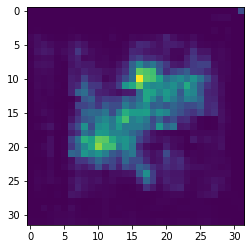

In [60]:
plt.imshow(predicted[0].squeeze(0).detach().cpu().numpy())

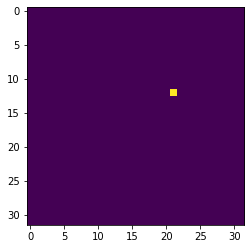

In [61]:
plt.imshow(target[0].cpu().numpy())